**Our model is based on the logistic curve to predict the Confirmed Cases of COVID-19 in the United Stated.**

**Thank you Mehdi Afshari for extracting the updated data.**

**Hope you enjoy our model.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from scipy.optimize import curve_fit
from scipy.special import expit

# Extract Data

In [ ]:
# Extract the update data

BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
CONFIRMED = 'time_series_covid19_confirmed_global.csv'
DEATH = 'time_series_covid19_deaths_global.csv'
RECOVERED = 'time_series_covid19_recovered_global.csv'
CONFIRMED_US = 'time_series_covid19_confirmed_US.csv'
DEATH_US = 'time_series_covid19_deaths_US.csv'

def get_covid_data(subset = 'CONFIRMED'):
    """This function returns the latest available data subset of COVID-19. 
        The returned value is in pandas DataFrame type.
    Args:
        subset (:obj:`str`, optional): Any value out of 5 subsets of 'CONFIRMED',
        'DEATH', 'RECOVERED', 'CONFIRMED_US' and 'DEATH_US' is a valid input. If the value
        is not chosen or typed wrongly, CONFIRMED subet will be returned.
    """    
    switcher =  {
                'CONFIRMED'     : BASE_URL + CONFIRMED,
                'DEATH'         : BASE_URL + DEATH,
                'RECOVERED'     : BASE_URL + RECOVERED,
                'CONFIRMED_US'  : BASE_URL + CONFIRMED_US,
                'DEATH_US'      : BASE_URL + DEATH_US,
                }

    CSV_URL = switcher.get(subset, BASE_URL + CONFIRMED)

    with requests.Session() as s:
        download        = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        data            = pd.read_csv(io.StringIO(decoded_content))

    return data

In [ ]:
# Get US confirmed, death, and recovered data
confirmed = get_covid_data(subset = 'CONFIRMED')
death = get_covid_data(subset = 'DEATH')
recovered = get_covid_data(subset = 'RECOVERED')

confirmed_US = confirmed[confirmed['Country/Region']=='US']
death_US = death[death['Country/Region']=='US']
recovered_US = recovered[recovered['Country/Region']=='US']

In [ ]:
print(confirmed_US.shape)
print(death_US.shape)
print(recovered_US.shape)

In [ ]:
confirmed_US.head()

In [ ]:
# Visualization Data
plt.plot(range(len(confirmed_US.columns)-4), confirmed_US.iloc[0,4:])
plt.plot(range(len(death_US.columns)-4), death_US.iloc[0,4:])
plt.plot(range(len(recovered_US.columns)-4), recovered_US.iloc[0,4:])

US =['confirmed_US', 'death_US', 'recovered_US']
plt.legend(US)
plt.title('Total Number of COVID-19 Cases in the United State')
plt.xlabel('Day')
plt.ylabel('Number of Cases')

# Preprocess data

In [ ]:
# dates -- Can be changed free
d=2

df_confirmed_train = pd.DataFrame(confirmed_US.iloc[0,4:-d])
print('train', df_confirmed_train.shape)
print('train', type(df_confirmed_train))

df_confirmed_test = pd.DataFrame(confirmed_US.iloc[0,-d:])
print('test', df_confirmed_test.shape)
print('test', type(df_confirmed_test))


In [ ]:
x_data = range(len(df_confirmed_train))
x_data

In [ ]:
y_data = df_confirmed_train[225].values
y_data

In [ ]:
All = pd.DataFrame(confirmed_US.iloc[0,4:])
All_x_data = range(len(All))
All_y_data = All[225].values

# Logistic Cureve Fitting

In [ ]:
def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=10000000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(All_x_data, k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(All_x_data, y_fitted, '--', label='fitted')
ax.plot(All_x_data, All_y_data, 'o', label='Confirmed Data')
plt.legend()
plt.title('Total Number of Confimed COVID-19 Cases in the United State')
plt.xlabel('Day')
plt.ylabel('Number of Cases')

In [ ]:
#For predict the next two-day's confirmed case in US
predict_set = range(len(All)+2)
y_predict = log_curve(predict_set, k, x_0, ymax)
print('In next two days, we predict the total Confirmed Cases in US are: ',y_predict[-2:])

# Explain

**We run the dataset in both Jupyter notebook and Kaggle, but they gave us different prediction. In Kaggle, the implementation always gives us 'overflow warning', but in Jupyter notebook it is fine. Therefore, we suggest using Jupyter note to run our code, and it will provide us good prediction. The following picture is the fitting graph we got in Jupyter notebook**

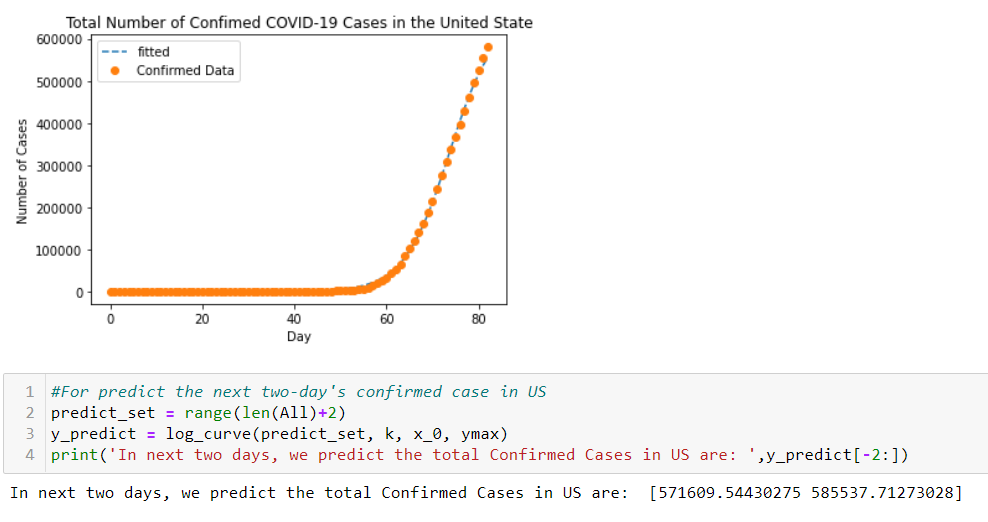